In [1]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

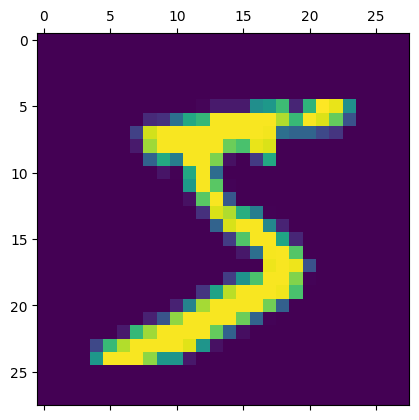

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
X_train.shape

(60000, 28, 28)

In [26]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255 # to make in range (0-1)
X_test /= 255

In [27]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
x_train_flattened = X_train.reshape(len(X_train), 28*28)
x_test_flattened = X_test.reshape(len(X_test), 28*28)
x_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
x_train_flattened.shape

(60000, 784)

In [30]:
x_test_flattened.shape

(10000, 784)

In [31]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape= (784,), activation= 'sigmoid')
])

model.compile(
    optimizer= 'adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

c:\Users\shahs_snohmej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8078 - loss: 0.7276
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9115 - loss: 0.3136
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9205 - loss: 0.2848
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9245 - loss: 0.2719
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9260 - loss: 0.2671


In [33]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9163 - loss: 0.3050


[0.2690860629081726, 0.9264000058174133]

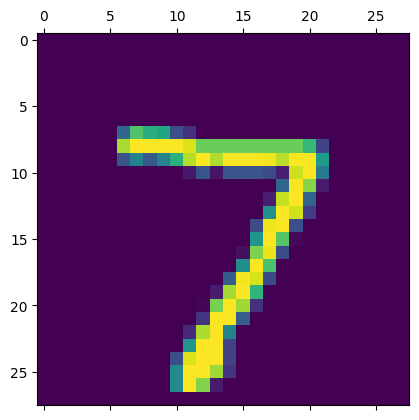

In [35]:
plt.matshow(X_test[0])

In [36]:
y_predict = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step


In [37]:
y_predict[0]

array([2.2051731e-02, 3.1458461e-07, 8.9414611e-02, 9.3829304e-01,
       2.1765239e-03, 1.2803155e-01, 1.6735065e-06, 9.9965954e-01,
       7.9264358e-02, 5.2901375e-01], dtype=float32)

In [38]:
np.argmax(y_predict[0])

7

In [39]:
y_predict_labels = [np.argmax(i) for i in y_predict] 
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [42]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    6,    8,    2,    1,    0],
       [   0, 1108,    5,    2,    0,    2,    4,    2,   12,    0],
       [   3,    6,  950,   10,    8,    5,   13,    8,   26,    3],
       [   3,    0,   26,  912,    0,   29,    3,   10,   20,    7],
       [   1,    1,    6,    2,  912,    0,   14,    4,   11,   31],
       [   9,    2,    3,   22,    9,  795,   18,    4,   26,    4],
       [   7,    3,    7,    1,    7,   10,  920,    2,    1,    0],
       [   1,    6,   33,    5,    5,    2,    0,  948,    2,   26],
       [   7,    7,   11,   21,    8,   37,   10,   11,  858,    4],
       [  10,    7,    2,   11,   33,   11,    0,   26,    7,  902]])>

Text(95.72222222222221, 0.5, 'Truth')

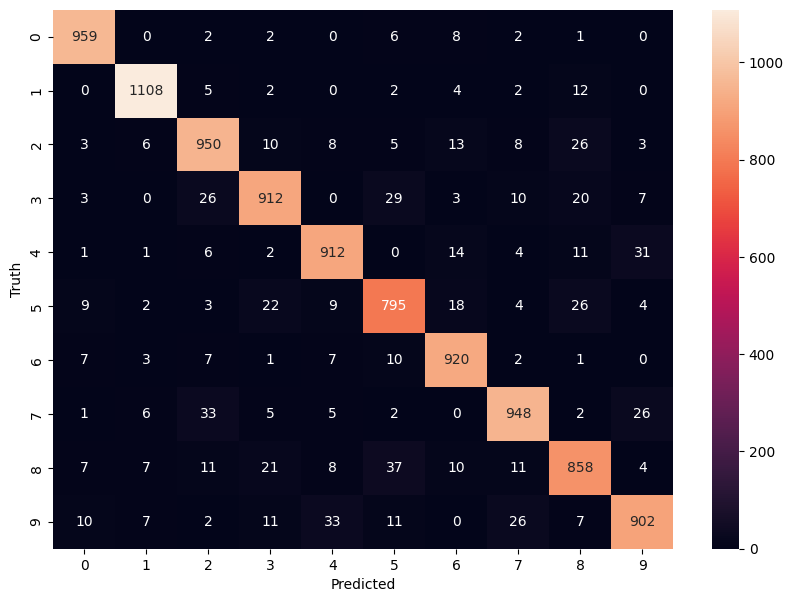

In [43]:
import seaborn as sn 
plt.figure(figsize= (10, 7))
sn.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape= (784,), activation= 'relu'),
    keras.layers.Dense(10, activation= 'sigmoid')
])

model.compile(
    optimizer= 'adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5


c:\Users\shahs_snohmej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8723 - loss: 0.4555
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9608 - loss: 0.1317
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9749 - loss: 0.0852
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9797 - loss: 0.0654
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9852 - loss: 0.0478


In [48]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9710 - loss: 0.0979


[0.08365727216005325, 0.9750000238418579]

Text(95.72222222222221, 0.5, 'Truth')

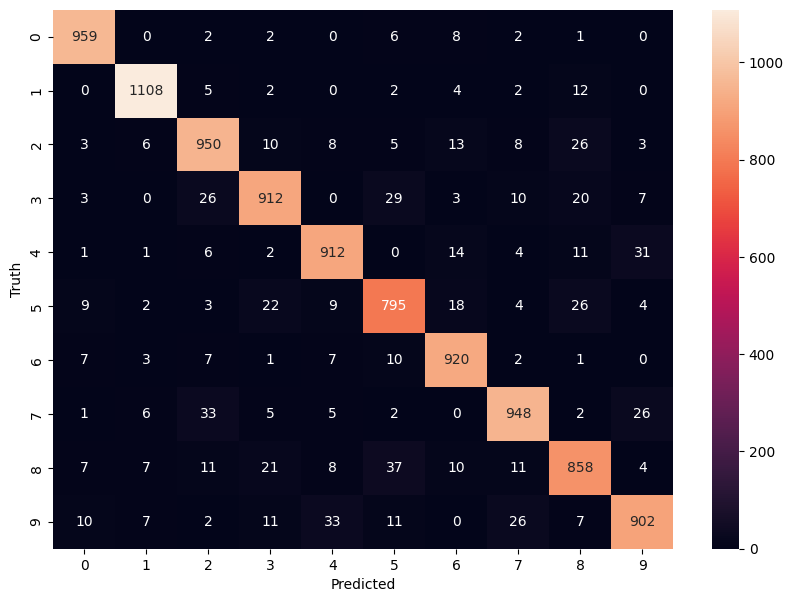

In [49]:
import seaborn as sn 
plt.figure(figsize= (10, 7))
sn.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (28, 28)),
    keras.layers.Dense(100, activation= 'relu'),
    keras.layers.Dense(10, activation= 'sigmoid')
])

model.compile(
    optimizer= 'adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

#without making flatten array
model.fit(X_train, y_train, epochs=5)

Epoch 1/5


c:\Users\shahs_snohmej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8744 - loss: 0.4518
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9619 - loss: 0.1349
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9733 - loss: 0.0891
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9804 - loss: 0.0653
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9852 - loss: 0.0497
